**Life Expectancy Analysis**

**1.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

**2. Loading the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Life Expectancy Data.csv')

**3. Data Exploration**

In [ ]:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

**4. Data Cleaning**

In [ ]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = imputer.fit_transform(df[[col]])

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

**5. Handling Outliers**

In [ ]:
# Handling Outliers

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])

**6. Exploratory Data Analysis (EDA)**

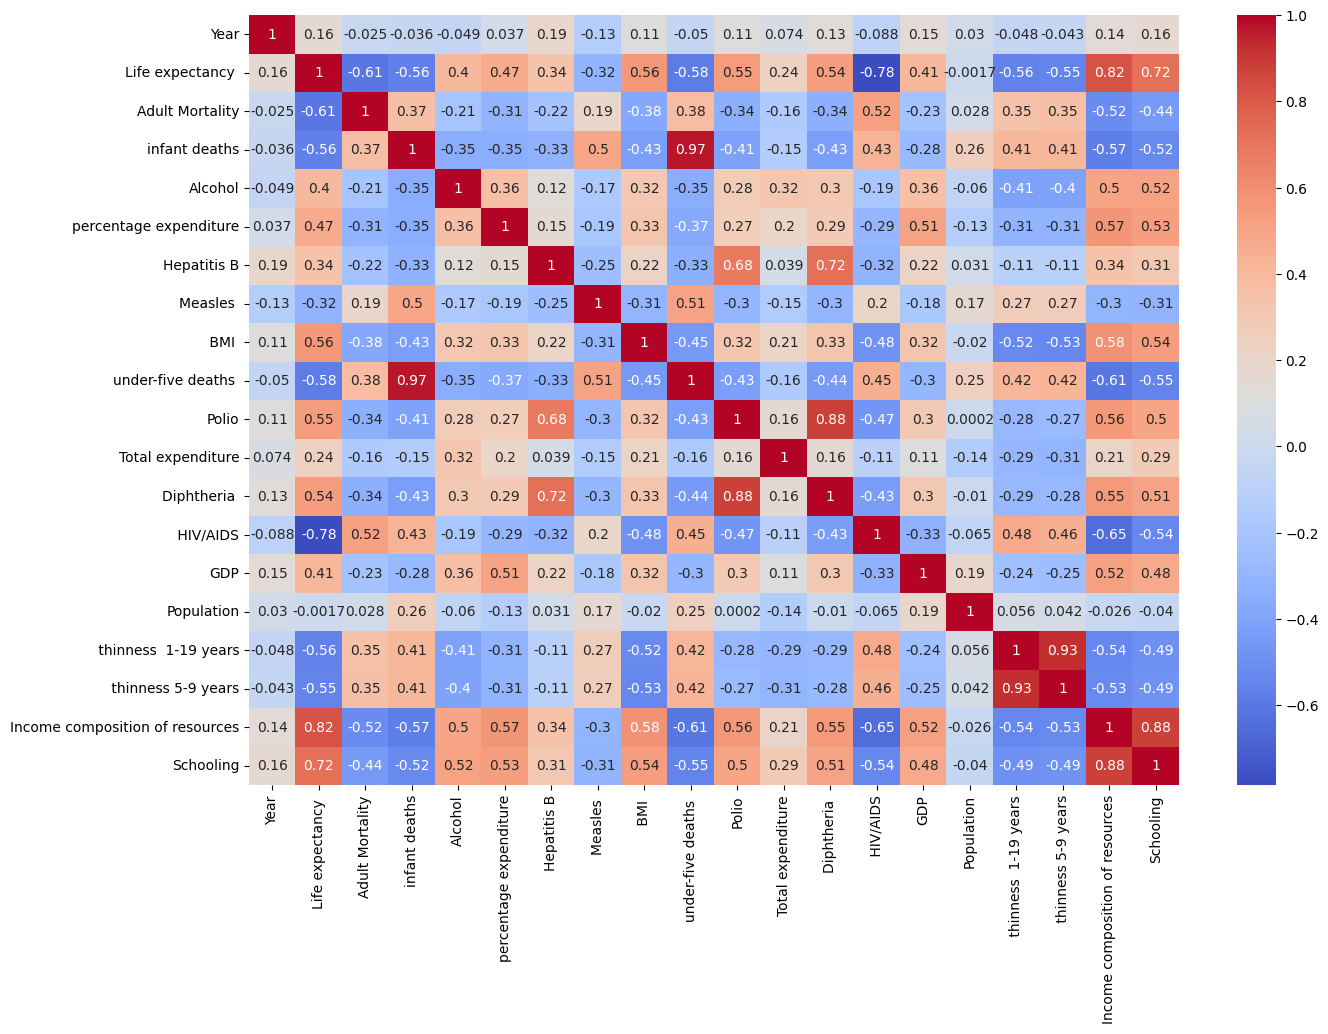

In [ ]:
# Correlation matrix
plt.figure(figsize=(15, 10))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

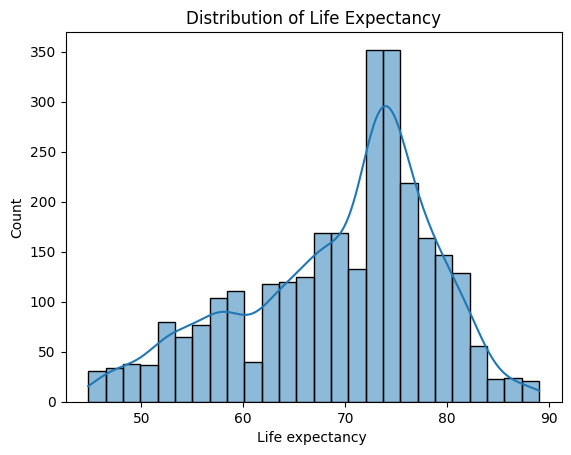

In [ ]:
# Life Expectancy distribution
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

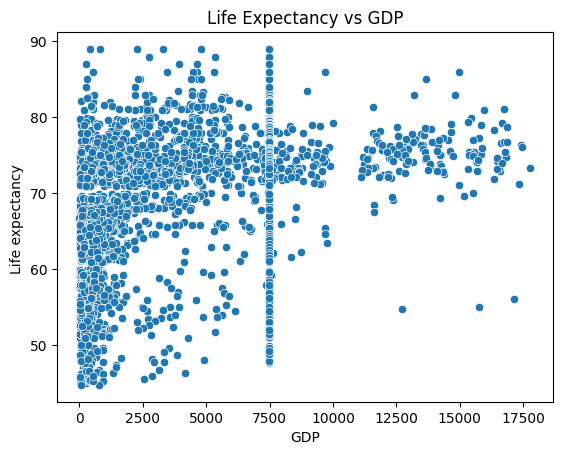

In [ ]:
# Life Expectancy vs GDP
sns.scatterplot(x='GDP', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs GDP')
plt.show()

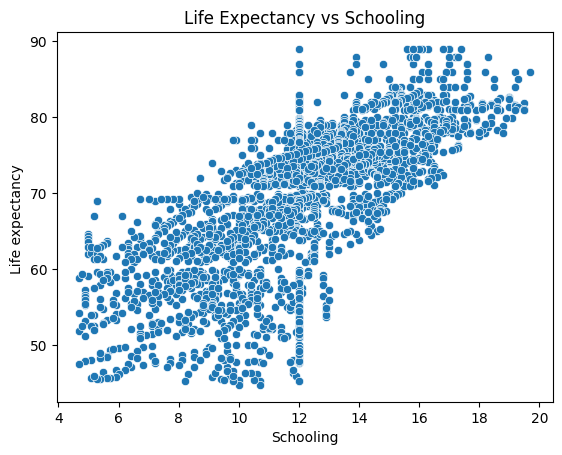

In [ ]:
# Life Expectancy vs Schooling
sns.scatterplot(x='Schooling', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs Schooling')
plt.show()

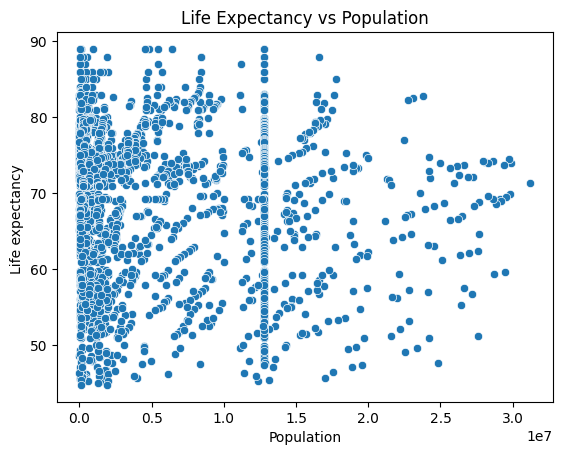

In [ ]:
# Life Expectancy vs Population
sns.scatterplot(x='Population', y='Life expectancy ', data=df)
plt.title('Life Expectancy vs Population')
plt.show()

Feature ranking:
1.  HIV/AIDS (0.582721)
2. Income composition of resources (0.169145)
3. Adult Mortality (0.106498)
4. Schooling (0.026219)
5. under-five deaths  (0.015798)
6.  thinness 5-9 years (0.011825)
7.  BMI  (0.011810)
8. Year (0.010636)
9. infant deaths (0.010536)
10. Alcohol (0.010533)
11. Total expenditure (0.009052)
12.  thinness  1-19 years (0.009027)
13. Polio (0.004522)
14. Population (0.004434)
15. Measles  (0.003828)
16. GDP (0.003701)
17. percentage expenditure (0.003597)
18. Diphtheria  (0.003157)
19. Hepatitis B (0.002614)
20. Status (0.000347)


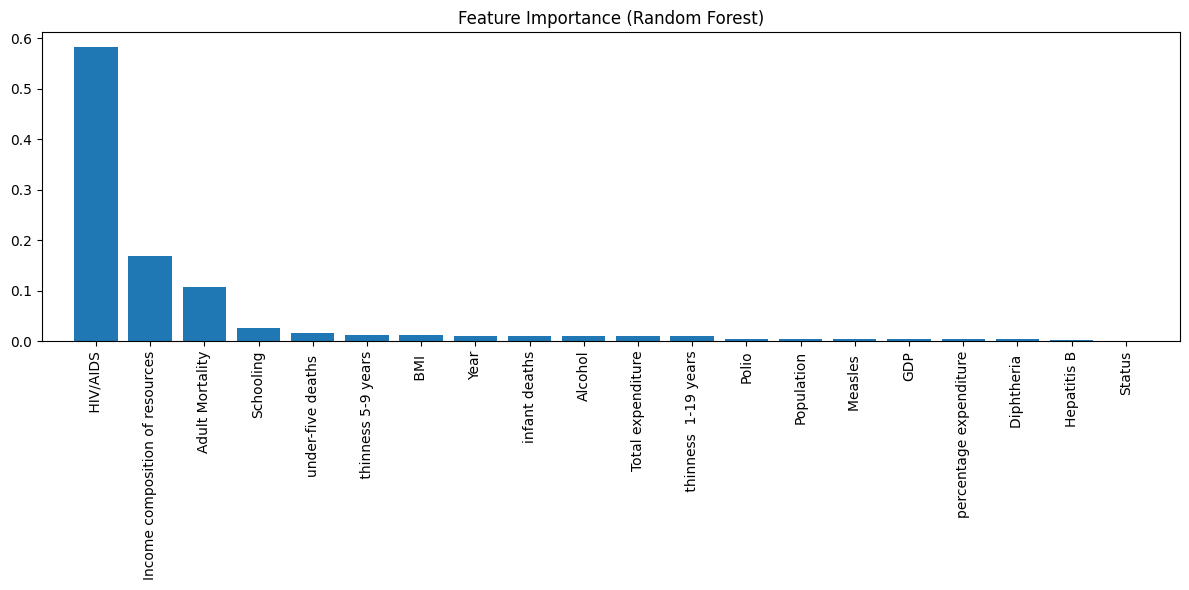

In [ ]:
# Feature Importance from Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

**7. Data Preprocessing**

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [ ]:
# Select only numerical features for scaling
numerical_features = df.drop(['Life expectancy ', 'Country'], axis=1).select_dtypes(include=['number'])

# Apply StandardScaler to numerical features only
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with scaled numerical features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features.columns, index=df.index)

# Concatenate scaled numerical features with original categorical features
final_df = pd.concat([df[['Country', 'Life expectancy ']], scaled_df], axis=1)

**8. Model Building and Evaluation**

In [ ]:
X = pd.DataFrame(scaled_features, columns=numerical_features.columns) # Use numerical_features.columns
y = df['Life expectancy ']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

In [ ]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results.append({'Model': name, 'R2 Score': r2, 'RMSE': rmse})

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

               Model  R2 Score      RMSE
1        Extra Trees  0.961428  1.794121
0      Random Forest  0.948727  2.068527
3            XGBoost  0.947263  2.097850
2  Gradient Boosting  0.922813  2.537975


In [ ]:
# Regression Analysis with Healthcare Expenditure
import statsmodels.formula.api as sm

# Create a formula for the regression model
formula = 'Q("Life expectancy ") ~ Q("Total expenditure")'  # Use Q() for column names with spaces

# Fit the regression model
model = sm.ols(formula, data=df).fit()

# Print the model summary
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.059
Model:                               OLS   Adj. R-squared:                  0.059
Method:                    Least Squares   F-statistic:                     183.6
Date:                   Tue, 04 Feb 2025   Prob (F-statistic):           1.28e-40
Time:                           17:38:41   Log-Likelihood:                -10628.
No. Observations:                   2938   AIC:                         2.126e+04
Df Residuals:                       2936   BIC:                         2.127e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

**9. Hyperparameter Tuning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [ ]:
# Final model evaluation
best_model = grid_search.best_estimator_
final_preds = best_model.predict(X_test)
final_r2 = r2_score(y_test, final_preds)
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

In [ ]:
print(f"Final Model R2 Score: {final_r2}")
print(f"Final Model RMSE: {final_rmse}")

Final Model R2 Score: 0.9533942183400977
Final Model RMSE: 1.9721306659974502


**10. Cross-Validation**

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_model, X, y, cv=kf, scoring='r2')

In [ ]:
print(f"Cross-Validation R2 Mean: {cross_val_scores.mean()}")
print(f"Cross-Validation R2 Std Dev: {cross_val_scores.std()}")

Cross-Validation R2 Mean: 0.9482218162871476
Cross-Validation R2 Std Dev: 0.010536760928022167


**Conclusion**:
This project aimed to analyze the factors influencing life expectancy using machine learning techniques. Through data exploration, cleaning, and preprocessing, a robust dataset was prepared for model building. Several regression models were trained and evaluated, with XGBoost demonstrating the highest performance. Hyperparameter tuning and cross-validation further enhanced the model's accuracy and generalizability.

The analysis revealed significant correlations between life expectancy and factors such as GDP, schooling, and healthcare expenditure. Feature importance analysis highlighted the prominent role of these variables in predicting life expectancy. The final model achieved an R2 score of 0.9533942183400977 and an RMSE of 1.9721306659974502, indicating its strong predictive capabilities.

These findings underscore the importance of socioeconomic factors in public health and provide valuable insights for policymakers and healthcare professionals. Further research could explore the impact of specific policies and interventions on life expectancy. Additionally, incorporating more comprehensive data on environmental and lifestyle factors could improve the model's accuracy and provide a more holistic understanding of life expectancy determinants.

